## Homework 2

Due 3/20 11:59

100 points

Rename this file your_rcs_id_Homework2 and upload to the LMS when complete.

Make sure your output is shown for each part.


The homework is intended to give you practice with Bayesian Modeling of real world data. 

The homework will consist of a jupyter notebook that presents a coherent and comprehensive report on a **Classification** model of a real world dataset. It should be in the form of a report that has both text cells and code cells. The text cells are used to explain each step in the modeling effort and comment on the code cell results. Grading will be based on both code and textual descriptions and explanations.

Find a dataset on a some topic. Preferably a topic that interests you and you want to learn something about the process that generated this data.

Your report should include (but is not limited to):

1) Where you found the data set and a link to it.

2) A description of the dataset and the goal of the model (i.e. what are you trying to classify.)
    - Describe the response variable?
    - Describe the predictors? **There should be three or more predictors**
    
3) Reading in the data set and showing the head and tail
    
4) Data Preprocessing
    - Checking for and handling of missing values
    - Any manipulations you make to the dataset
   
    
5) Exploratory Data Analysis
    - Descriptive Statistics
    - Visualization of variables and their relationship
        - Comment on the  the visualization (i.e. what is your interpretation of the plot)
    - Correlations of the variables with comments
    
6) Data Preparation
    - Extract variables from data set
    - Encode categorical variable(s) when necessary
    - Split the data into training and test sets
    - Scale the data
    - Show the shapes of the datasets
    
7) PyMC3 Model Specification with comments
    - e.g. what specifies the likelihood, what are the parameters

8) Generate the Data Prior Predictive Distribution 
    - Display the distribution
    
9) Perform the inferencing: i.e. Generate the Posterior Distributions of the parameters
    - Discuss if needed to increase tuning and/or target acceptance criteria
    
10) Provide plots, a summary and discuss how well your model converged

11) Comment on the coefficients in the model summary.

12) Plot the posterior distribution of the parameters

13) Do some model checking by generating the posterior predictive distribution of the training set and
compare with section 9.

14) Predict new data using the testset. 

15) Create a Confusion Matrix and report the accuracy of your predictions




### Hint

* Avoid categorical predictors with more than two levels that don't have an implied order

* Don't scale categorical variables. Use StandardScaler for numeric variables - see below

* If you do want to use categorical predictors with more than two levels that don't have an implied order you must one hot encode -- see below

#### Example of One-hot encoding for pclass, and use standard scaler for age and far

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')

import pymc3 as pm
import arviz as az


from sklearn.preprocessing import StandardScaler

print(f'Runing on PyMC3 v{pm.__version__}')

Runing on PyMC3 v3.8


In [100]:
titanic = sns.load_dataset("titanic")
titanic = titanic.dropna()
titanic = titanic.iloc[:,[0,1,2,3,6]]
titanic.tail()

,survived,pclass,sex,age,fare
871,1,1,female,47.0,52.5542
872,0,1,male,33.0,5.0000
879,1,1,female,56.0,83.1583
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


#### pd.get_dummies is pandas one-hot encoder

In [101]:

df = pd.get_dummies(titanic.pclass,prefix="pclass") # Creates separate data frame
df = pd.concat([titanic,df],axis=1) # Merge with titanic data frame
df['sex'] = pd.Categorical(df.sex).codes
df.head()

,survived,pclass,sex,age,fare,pclass_1,pclass_2,pclass_3
1,1,1,0,38.0,71.2833,1,0,0
3,1,1,0,35.0,53.1000,1,0,0
6,0,1,1,54.0,51.8625,1,0,0
10,1,3,0,4.0,16.7000,0,0,1
11,1,1,0,58.0,26.5500,1,0,0


In [102]:
y = titanic.survived.values
X = df.loc[:,['pclass_1','pclass_2','pclass_3','sex','age','fare']].values
num_predictors = X.shape[1]
y.shape,X.shape

((182,), (182, 6))

#### Use Standard Scaler to scale numeric variables

In [103]:
sc = StandardScaler()
X[:,[4,5]] = sc.fit_transform(X[:,[4,5]])
X[0:5,:]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.15208196,
        -0.10011013],
       [ 1.        ,  0.        ,  0.        ,  0.        , -0.03987502,
        -0.33848477],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  1.17585249,
        -0.35470782],
       [ 0.        ,  0.        ,  1.        ,  0.        , -2.02343043,
        -0.81567192],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.43179512,
        -0.68654298]])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:06<00:00, 448.68draws/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,2.094,1.314,-0.310,4.556,0.051,0.038,666.0,611.0,667.0,670.0,1.0
beta[0],0.621,1.288,-1.746,3.004,0.049,0.035,694.0,694.0,700.0,650.0,1.0
beta[1],0.574,1.305,-1.987,2.839,0.047,0.033,763.0,763.0,763.0,957.0,1.0
beta[2],-0.965,1.360,-3.562,1.532,0.050,0.036,754.0,731.0,758.0,1136.0,1.0
beta[3],-2.773,0.465,-3.664,-1.928,0.012,0.009,1425.0,1405.0,1431.0,1333.0,1.0
beta[4],-0.553,0.208,-0.952,-0.167,0.006,0.004,1192.0,1192.0,1195.0,1283.0,1.0
beta[5],0.090,0.202,-0.307,0.448,0.006,0.005,1300.0,920.0,1315.0,1058.0,1.0


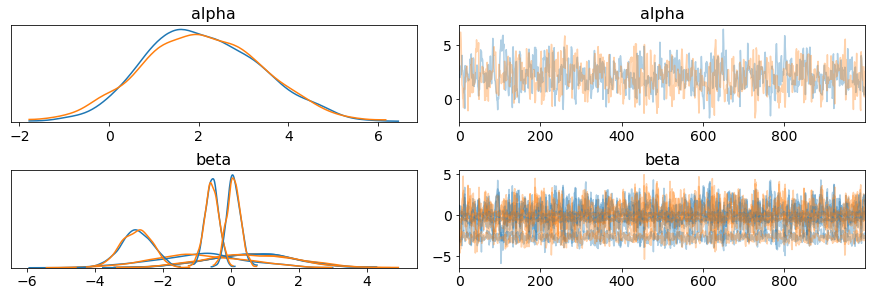

In [104]:
with pm.Model() as model_log:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=2, shape=num_predictors) 
    
    mu = alpha + pm.math.dot(X, beta)
    theta = pm.math.sigmoid(mu) #logistic
    
    yl = pm.Bernoulli('yl', p=theta, observed=y)

    trace_log = pm.sample(1000,random_seed=42)

pm.traceplot(trace_log)
pm.summary(trace_log)

# Homework 2 Solution:

## Part 1: Basic Description of the Data Set

<p style='text-align:justify;'>In this report we present a classification model, its corresponding analysis and measurements of the replicability of the model. We used a Kaggle data set about the amount of alcohol consumption of students in a secondary school in Portugal. In this data set there is data about their family structure, gender information and social conditions. We want to develop a model to classify their parents' cohabitation status ('T': living together, 'A': apart). Although the data set contains 32 parameters we will focus on predictors about the students alcohol consumption (weekly and on the weekends), their grades (First period, second period and final grade), quality of family relationships, time travel from home to school, their weekly study time, free time after school, father education and mother education.</p>

The link to the data set is: https://www.kaggle.com/uciml/student-alcohol-consumption#student-mat.csv

## Part 2: Response Variable and Predictors

### Response Variable:

* Parents'cohabitation status ('T': living together, 'A': Apart)

### Predictors:

* Walc: Weekend alcohol consumption of students (1- Very low, 5- Very high)
* Dalc: Week alcohol consumption of students (1- Very low, 5- Very high)
* G1: First period grade (From 0 to 20)
* G2: Second period grade (From 0 to 20)
* G3: Final grade (From 0 to 20)
* famrel: Quality of family relationships (1- very bad, 5- excellent)
* traveltime: Home to school travel (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* freetime: Free time after school (numeric: from 1 - very low to 5 - very high)
* Medu: Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary
* Fedu: Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary

## Part 3: Data set Summary and Preprocessing

In [1]:
#We import the necessary libraries for the analysis and the model.
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')

import pymc3 as pm
import arviz as az


from sklearn.preprocessing import StandardScaler

print(f'Runing on PyMC3 v{pm.__version__}')

Runing on PyMC3 v3.8


We present accordingly the variables that the data set has with its respective predictors and the head and tail of the original data.

In [2]:
alcohol_consumption=pd.read_csv('student-mat.csv')
print(alcohol_consumption.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')>


In [3]:
#We show the head of the data set.
alcohol_consumption.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#We show the tail of the data set.
alcohol_consumption.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


Although predictors such as Medu, Fedu, studytime, freetime and goout are categorical predictors, they have an order and a score already defined that has an explicit order from the data set.

## Part 4: Exploratory Data Analysis and Data Preparation

We take the data set and create a DataFrame with the predictors that we are going to use and were defined in the previous section. Additionally, we analyze if there are any missing values.

In [5]:
#We define the dataframe with the corresponding predictors for the analysis.
alc_consump=alcohol_consumption.loc[:,['age','famrel','Medu','Fedu','traveltime','studytime','freetime','Dalc','Walc','G1','G2','G3','Pstatus']]
#We analyze if there are any null values for processing the data.
np.sum(pd.isnull(alc_consump))

age           0
famrel        0
Medu          0
Fedu          0
traveltime    0
studytime     0
freetime      0
Dalc          0
Walc          0
G1            0
G2            0
G3            0
Pstatus       0
dtype: int64

Using the function isnull() we confirmed that there were no missing values and as such we did not make any changes.

In [6]:
alc_consump.head()

,age,famrel,Medu,Fedu,traveltime,studytime,freetime,Dalc,Walc,G1,G2,G3,Pstatus
0,18,4,4,4,2,2,3,1,1,5,6,6,A
1,17,5,1,1,1,2,3,1,1,5,5,6,T
2,15,4,1,1,1,2,3,2,3,7,8,10,T
3,15,3,4,2,1,3,2,1,1,15,14,15,T
4,16,4,3,3,1,2,3,1,2,6,10,10,T


For the exploratoy data analysis we first present the basic statistics of the data set.

In [7]:
alc_consump.describe()

,age,famrel,Medu,Fedu,traveltime,studytime,freetime,Dalc,Walc,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,3.944304,2.749367,2.521519,1.448101,2.035443,3.235443,1.481013,2.291139,10.908861,10.713924,10.415190
std,1.276043,0.896659,1.094735,1.088201,0.697505,0.839240,0.998862,0.890741,1.287897,3.319195,3.761505,4.581443
min,15.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000
25%,16.000000,4.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,5.000000,4.000000,3.000000,2.000000,2.000000,4.000000,2.000000,3.000000,13.000000,13.000000,14.000000
max,22.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,19.000000,19.000000,20.000000


Then, we analyze the relation between the Pstatus variable with the different grades for each of the periods with a boxplot to analyze the distribution of the grades obtained by the students.

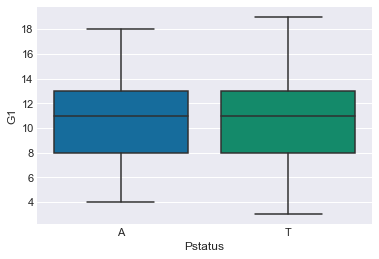

In [8]:
#We present the corresponding graphs of the histogram for each of the selected predictors.
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
sns.boxplot(x ="Pstatus", y="G1",data=alc_consump);

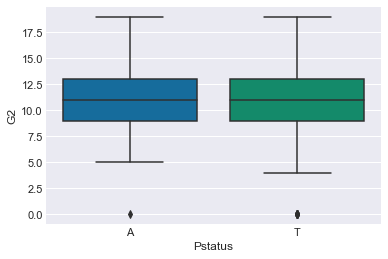

In [9]:
sns.boxplot(x ="Pstatus", y="G2",data=alc_consump);

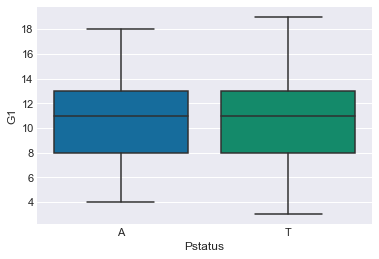

In [10]:
sns.boxplot(x ="Pstatus", y="G1",data=alc_consump);

<p style='text-align:justify;'>We see from the boxplots in terms of the grades that the average between each type of Pstatus is pretty similar. However, there is a small difference between the range of values between each of the statuses. We see how in general the range of students grades in each term when the families are together can be lower but they can also be higher. We then analyze the range of data between the weekly consumption of alcohol in relation to the status of the family.</p>

Text(0.5, 1.0, 'Week days Alcohol Consumption')

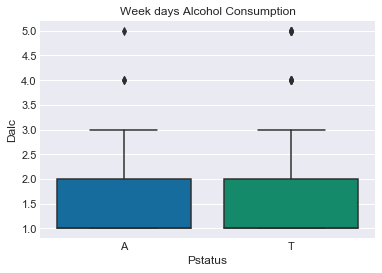

In [11]:
sns.boxplot(x ="Pstatus", y="Dalc",data=alc_consump);
plt.title('Week days Alcohol Consumption')

Text(0.5, 1.0, 'Weekend Alcohol Consumption')

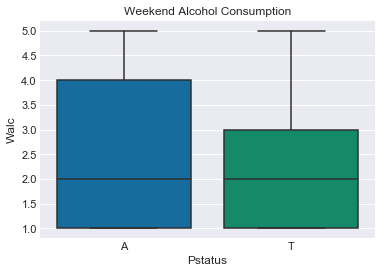

In [12]:
sns.boxplot(x ="Pstatus", y="Walc",data=alc_consump);
plt.title('Weekend Alcohol Consumption')

<p style='text-align:justify;'>Although the distribution of the data in the weekly consumption of alcohol looks similar between the Pstatus variable, we see that it increases considerably in terms of the week consumption having 75% of the data in 4 for separate families contrary to the same amount of data in a score of 3.</p>

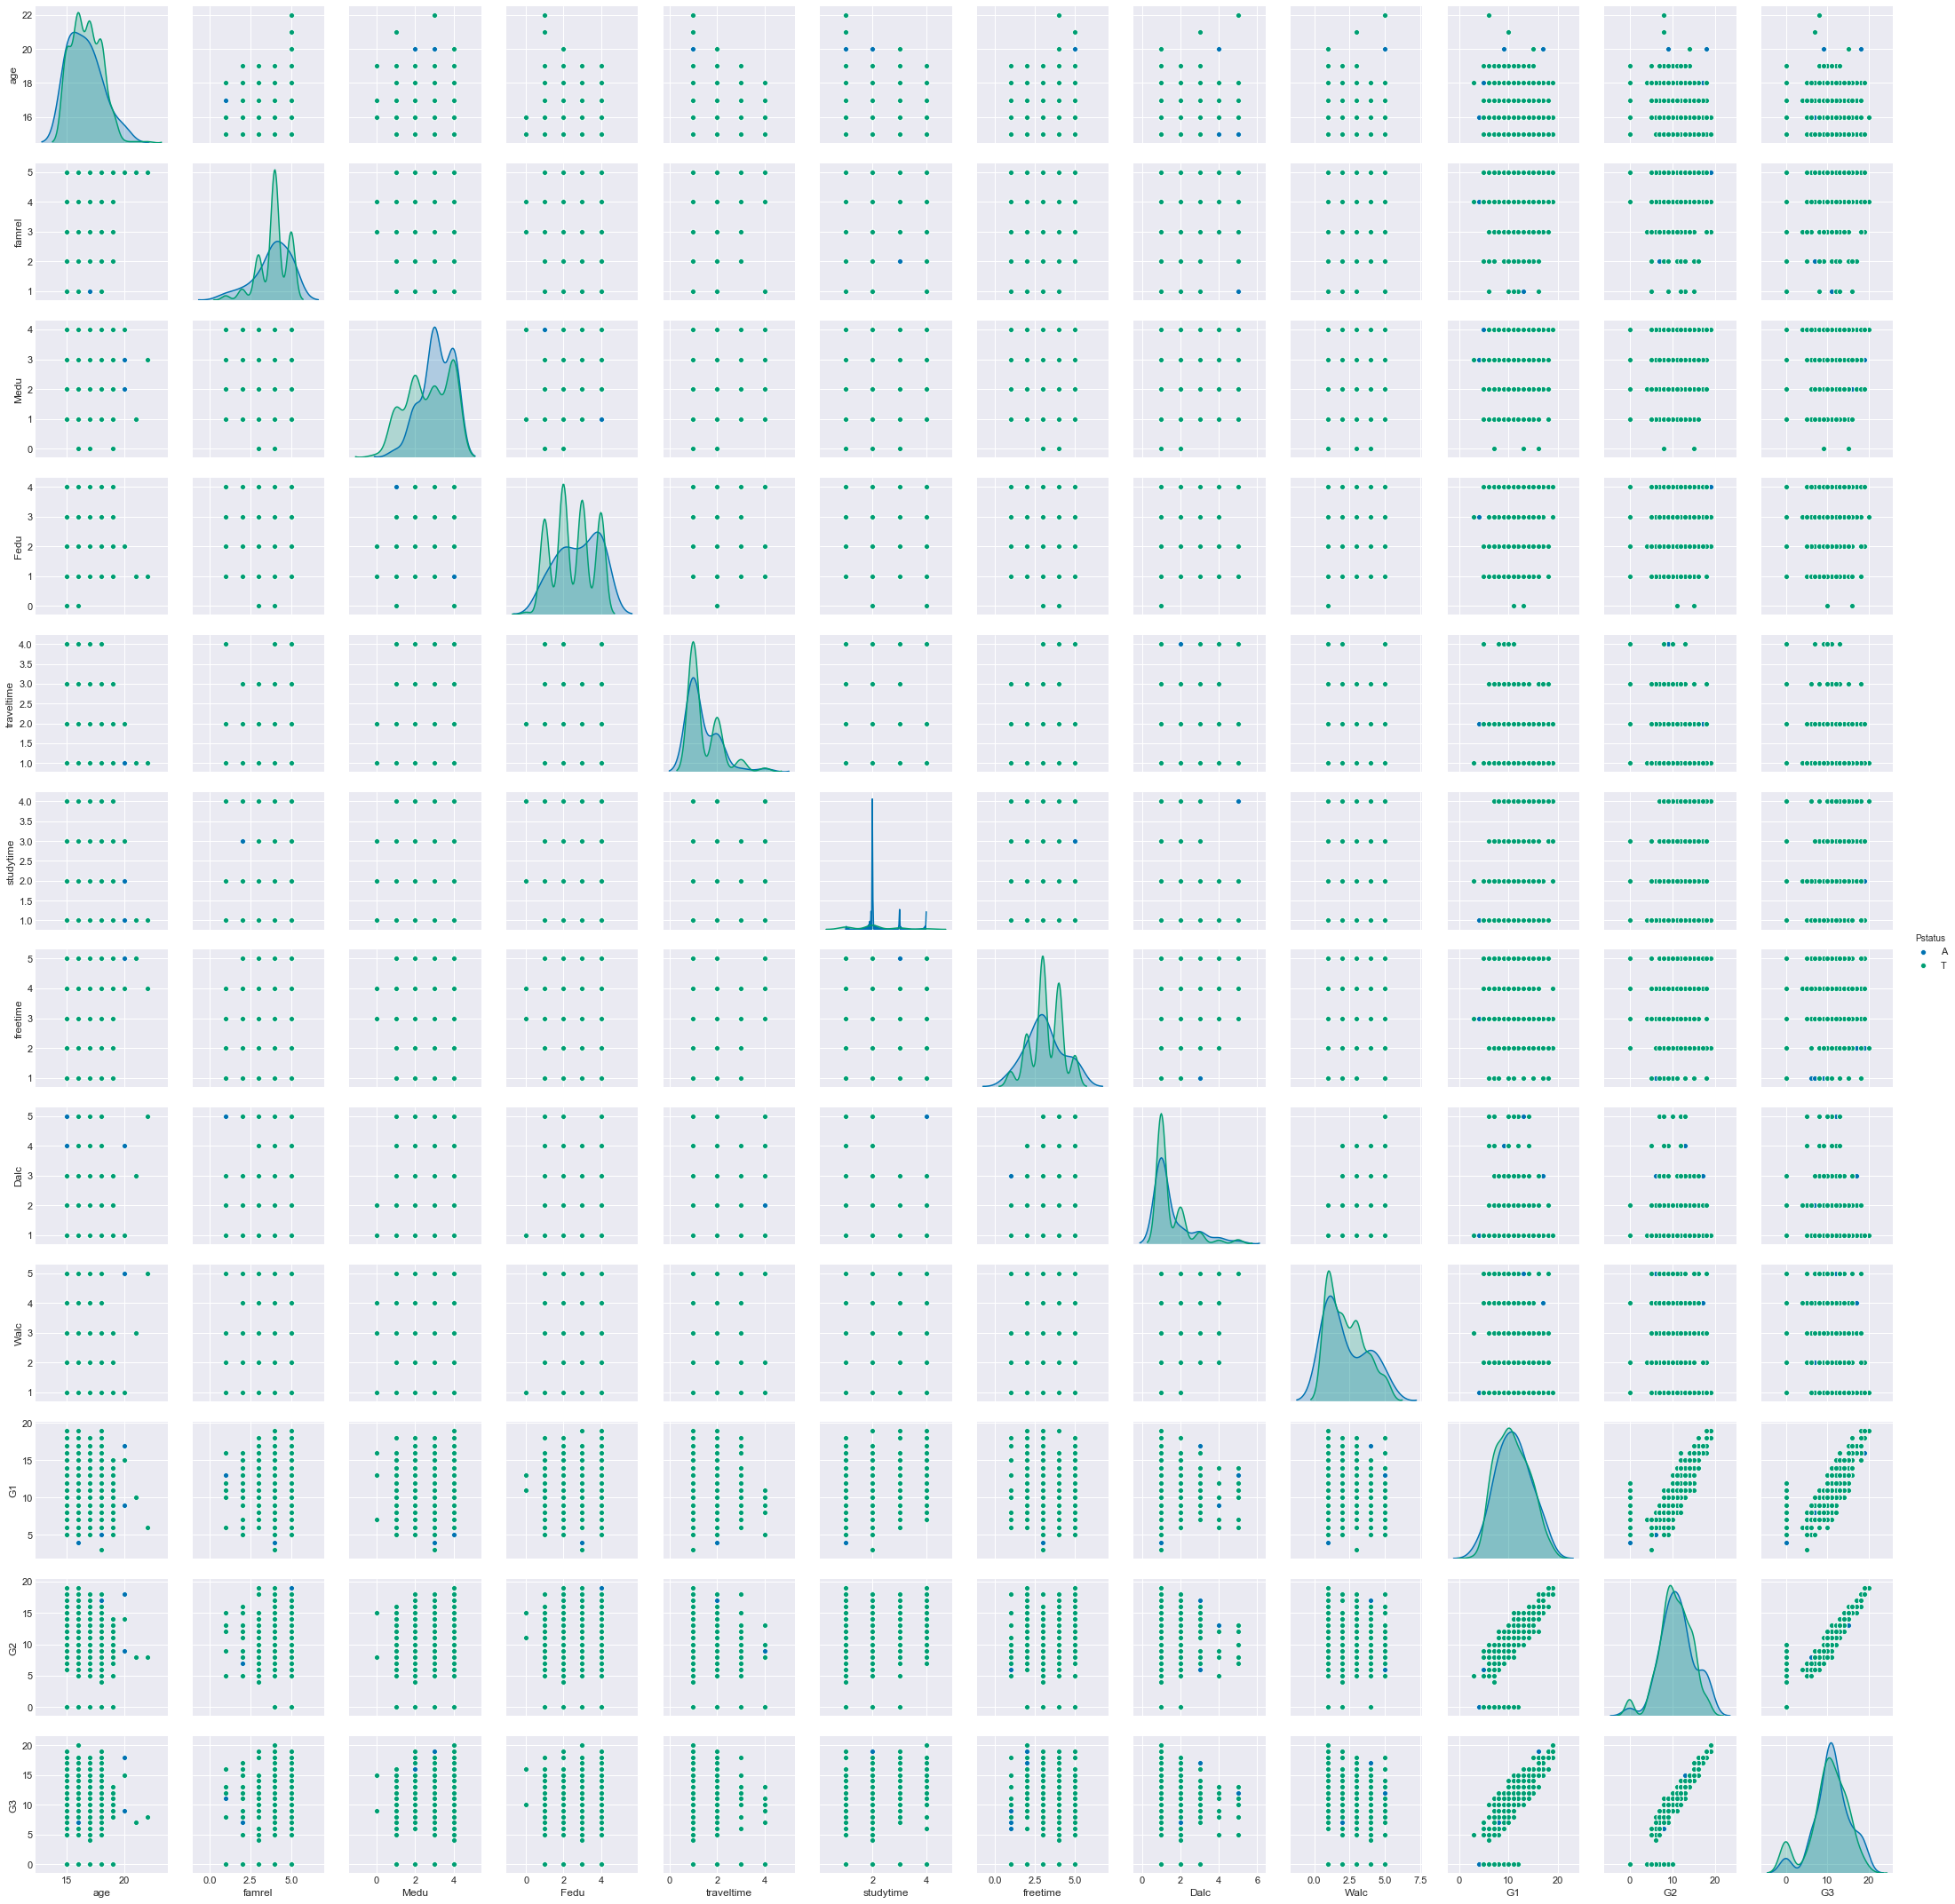

In [13]:
sns.pairplot(alc_consump, hue='Pstatus', diag_kind='kde');

<p style='text-align:justify;'>With the function of pairplots for seaborn we are able to establish the different scatterplots between each pair of variables. As we use so many predictors it is difficult to understand all the relationships. From the pairplots the only predictors that are positively correlated are G1, G2, G3. These are the predictors corresponding to the different grades the students have obtained during their semester. It is interesting as each of these periods has its own grades and it shows how the better grades at the beginning of the semester the better grades the students will have at the consecutive periods. We present the coefficient of correlation between these predictors:</p>

In [14]:
y = pd.Categorical(alc_consump['Pstatus']).codes 
np.corrcoef(alc_consump.G1.values,alc_consump.G2.values)

array([[1.        , 0.85211807],
       [0.85211807, 1.        ]])

In [15]:
np.corrcoef(alc_consump.G2.values,alc_consump.G3.values)

array([[1.        , 0.90486799],
       [0.90486799, 1.        ]])

In [16]:
np.corrcoef(alc_consump.G1.values,alc_consump.G3.values)

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

<p style='text-align:justify;'>The results of the correlation coefficient for each of the grades in each period is highly correlated. Furthermore, we analyze the values of the family status with the response variable to analyze if there is high correlation between the predictors and the variable.</p>

In [17]:
np.corrcoef(alc_consump.G1.values,y)

array([[ 1.        , -0.01686832],
       [-0.01686832,  1.        ]])

In [18]:
np.corrcoef(alc_consump.G2.values,y)

array([[ 1.       , -0.0413821],
       [-0.0413821,  1.       ]])

In [19]:
np.corrcoef(alc_consump.G3.values,y)

array([[ 1.        , -0.05800898],
       [-0.05800898,  1.        ]])

 <p style='text-align:justify;'>Although the correlation between the Pstatus and the grades of the students don't have a high correlation, we develop a PCA with the data set to analyze which parameters are necessary for the data prediction. We use a MinMaxScaler to format all the ranges in each of the predictos for the analysis.</p>

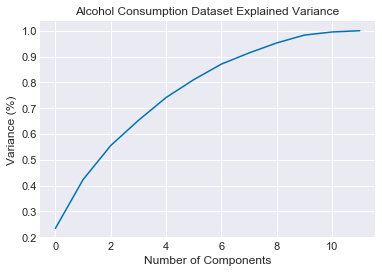

,age,famrel,Medu,Fedu,traveltime,studytime,freetime,Dalc,Walc,G1,G2,G3
0,18,4,4,4,2,2,3,1,1,5,6,6
1,17,5,1,1,1,2,3,1,1,5,5,6
2,15,4,1,1,1,2,3,2,3,7,8,10
3,15,3,4,2,1,3,2,1,1,15,14,15
4,16,4,3,3,1,2,3,1,2,6,10,10


In [20]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#We change the value of the variables from 'A' and 'T' to 0 and 1.
y = pd.Categorical(alc_consump['Pstatus']).codes 
X=alc_consump.loc[:,['age','famrel','Medu','Fedu','traveltime','studytime','freetime','Dalc','Walc','G1','G2','G3']]
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Alcohol Consumption Dataset Explained Variance')
plt.show()
X.head()

<p style='text-align:justify;'>We modify the data set so that X just uses G3 as they are the final grades of the students in the semester. We present the explained variance ratio for 10 components.</p>

In [21]:
pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)
num_predictors = X_pca.shape[1]
PCA(n_components=10)
print(pca.explained_variance_ratio_)

[0.7579098  0.0541846  0.04060344 0.03512674 0.02614256 0.02304076
 0.0179829  0.01211091 0.0111219  0.00811934]


<p style='text-align:justify;'>Although the variances in most of the predictors has not an extensive effect we decide to use all the predictors except for the G1 and G2 parameters.</p>

## Part 5: PyMC3 Model and Statistics:

<p style='text-align:justify;'> We now present the model and its corresponding analysis. We changed from 12 parameters to 10 based on the PCA analysis. We present a model based on the classification of the Pstatus for each of the students based of patterns in alcohol consumption and education from students and parents. For this we split the set between the train and the test set</p>

In [22]:
#Import the necessary libraries for the standard scaler and the split of data between train and test.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#Definition of the DataFrames with the changes presented from the PCA.
X=alc_consump.loc[:,['age','famrel','Medu','Fedu','traveltime','studytime','freetime','Dalc','Walc','G3']].values
#sc = StandardScaler()
#X[:,[0,9,10,11]] = sc.fit_transform(X[:,[0,9,10,11]])
#Definition of the true value of likelihood
y = pd.Categorical(alc_consump['Pstatus']).codes
n_feat=10
n_class = 2

In [23]:
#Division from the training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 10), (79, 10), (316,), (79,))

In [24]:
#We use the standard scaler to transform the values of age and grades as they are the numerical values in the data set.
sc = StandardScaler()
X_train[:,[0,9]] = sc.fit_transform(X_train[:,[0,9]])
X_test[:,[0,9]] = sc.transform(X_test[:,[0,9]])

<p style='text-align:justify;'>Using the standard scaler for the numerical values of the data set we present the  following model for predicting the family status that the students have based on the grades of mathematics and their lifestyles. We use a Bernoulli distribution as there are only two categories for the variable. Additionally, we use a sigmoid distribution (inverse logistic) to analyze the parameter $\theta$. Additionally, the parameters are defined as beta and alpha for the logistic regression and for the likelihood we define it as yl.</p>

In [36]:
#Model for the prediction of the distribution of the categories of the family status.
with pm.Model() as model_log:
    #Definition of the parameters.
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=2, shape=(n_feat))

    mu = alpha + pm.math.dot(X_train, beta)
    theta = pm.math.sigmoid(mu)
    #yl = pm.Categorical('yl', p=theta, observed=y_train)
    #Definition of the likelihood
    yl = pm.Bernoulli('yl', p=theta, observed=y_train)
    trace_log = pm.sample(2000,random_seed=42, tune=2000)
    trace_log_mv2 = pm.sample(2000,tune=2000,target_accept=.90, random_seed = 42)
    #Definition of the prior predictive for the analysis
    pred_prior_h_train = pm.sample_prior_predictive(samples = 2000,random_seed=1234)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 16000/16000 [02:19<00:00, 114.87draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 16000/16000 [02:40<00:00, 99.91draws/s] 


<p style='text-align:justify;'>Based on the model presented we develop the following prior predictive distributions to show how well or not are the data that is generated for $\alpha$ and the $\beta$s.</p>

In [28]:
pred_prior_h_train.keys()

dict_keys(['beta', 'alpha', 'yl'])

In [30]:
prior_alpha_train = pred_prior_h_train['alpha']
prior_beta_train = pred_prior_h_train['beta']
prior_yl_train = pred_prior_h_train['yl']
prior_alpha_train.shape, prior_beta_train.shape, prior_yl_train.shape

((2000,), (2000, 10), (2000, 316))

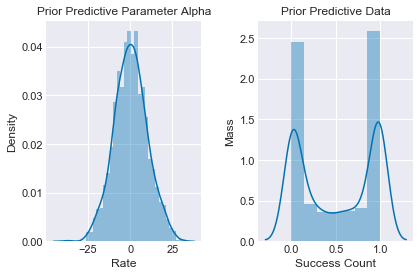

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2)
sns.distplot(prior_alpha_train,ax=ax1)
ax1.set_xlabel('Rate')
ax1.set_ylabel('Density')
ax1.set_title("Prior Predictive Parameter Alpha")

prior_vals = prior_yl_train.mean(axis=1) if prior_yl_train.ndim >  1 else prior_yl_train

sns.distplot(prior_vals,ax=ax2)
ax2.set_xlabel('Success Count')
ax2.set_ylabel('Mass')
ax2.set_title("Prior Predictive Data")
plt.tight_layout();

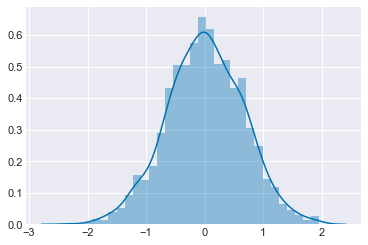

In [58]:
#prior_beta_train.shape
sns.distplot(prior_beta_train.mean(axis=1))

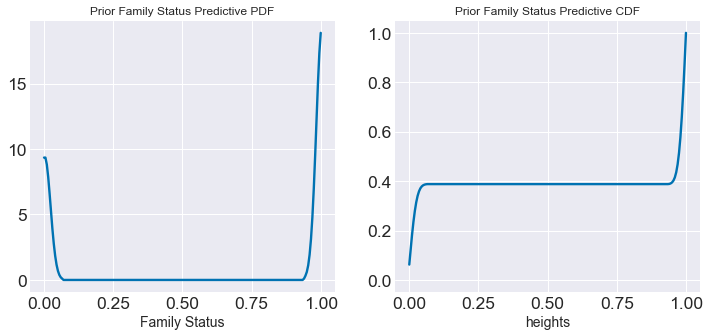

In [32]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
pm.kdeplot(pred_prior_h_train['yl'],ax=ax1)
ax1.set_xlabel('Family Status', fontsize=14)
ax1.set_title("Prior Family Status Predictive PDF")
pm.kdeplot(pred_prior_h_train['yl'],cumulative=True,ax=ax2)
ax2.set_xlabel('heights', fontsize=14)
ax2.set_title("Prior Family Status Predictive CDF");

<p style='text-align:justify;'>Using the prior predictives we present how the parameters are supposed to distribute depending on the original model. We now present the summary of the model to analyze how well or not this prior predictive aligns with the data generated by the model.</p>

C:\Users\danie\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\danie\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,3.008,1.551,0.100,5.943,0.023,0.016,4722.0,4544.0,4724.0,4871.0,1.0
beta[0],0.030,0.317,-0.581,0.610,0.003,0.004,9200.0,4032.0,9257.0,6226.0,1.0
beta[1],-0.197,0.233,-0.626,0.241,0.003,0.002,6883.0,5466.0,6915.0,5709.0,1.0
beta[2],-0.422,0.248,-0.892,0.036,0.003,0.002,6016.0,5469.0,6032.0,5819.0,1.0
beta[3],-0.061,0.228,-0.483,0.371,0.003,0.002,6269.0,4681.0,6272.0,6005.0,1.0
beta[4],0.024,0.297,-0.537,0.582,0.003,0.003,7955.0,4230.0,8046.0,5984.0,1.0
beta[5],0.421,0.258,-0.105,0.879,0.003,0.002,6485.0,5817.0,6500.0,4909.0,1.0
beta[6],0.174,0.196,-0.182,0.554,0.002,0.002,7444.0,5843.0,7447.0,5218.0,1.0
beta[7],0.019,0.288,-0.521,0.552,0.004,0.003,6285.0,4594.0,6293.0,5967.0,1.0
beta[8],0.018,0.196,-0.336,0.394,0.003,0.002,5782.0,5079.0,5787.0,6534.0,1.0


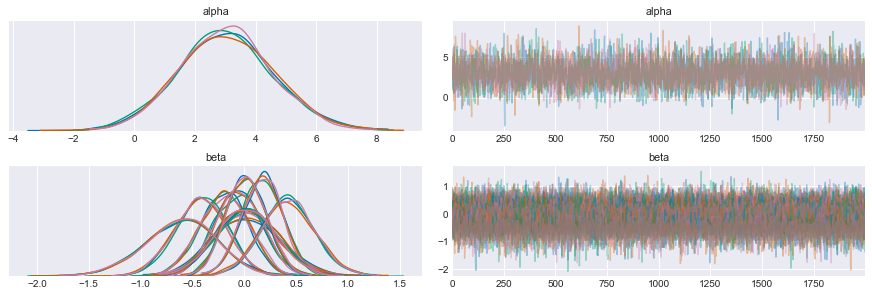

In [26]:
pm.traceplot(trace_log)
pm.summary(trace_log)

<p style='text-align:justify;'> Based on the model and the summary of the coefficients we can see how $\beta_4$ is the one with the least value and closer to 0. Furthermore, $\beta_5$ and $\beta_9$ have the greatest positive and negative value accordingly. Moreover, we used a tuning of 2000 as the values were not converging without the tuning and through trial and error this value of tuning was the one that was able to converge the values. Additionally, the prior predictive graphs in terms of $\beta$ seems to be within the range. However, $\alpha$ from the prior predictive seems to have a broader range from the values presented in the model. We present the model for the test data and with this test set we will present the sample posterior predictive for the training set. </p>

C:\Users\danie\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\danie\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,3.006,1.563,-0.099,5.768,0.025,0.018,3805.0,3805.0,3810.0,4875.0,1.0
beta[0],0.035,0.317,-0.523,0.663,0.004,0.004,6897.0,3954.0,6945.0,5750.0,1.0
beta[1],-0.201,0.233,-0.629,0.239,0.003,0.002,5117.0,4724.0,5107.0,5518.0,1.0
beta[2],-0.419,0.249,-0.896,0.040,0.003,0.002,5160.0,5025.0,5169.0,5677.0,1.0
beta[3],-0.062,0.235,-0.496,0.393,0.003,0.002,5878.0,4911.0,5891.0,5638.0,1.0
beta[4],0.023,0.298,-0.530,0.584,0.003,0.003,7418.0,4215.0,7570.0,5291.0,1.0
beta[5],0.424,0.262,-0.047,0.930,0.003,0.002,6367.0,5884.0,6379.0,5839.0,1.0
beta[6],0.181,0.200,-0.202,0.553,0.003,0.002,6198.0,5566.0,6211.0,5519.0,1.0
beta[7],0.010,0.289,-0.538,0.552,0.004,0.003,4706.0,4706.0,4717.0,5447.0,1.0
beta[8],0.019,0.196,-0.324,0.408,0.003,0.002,5057.0,4933.0,5059.0,5473.0,1.0


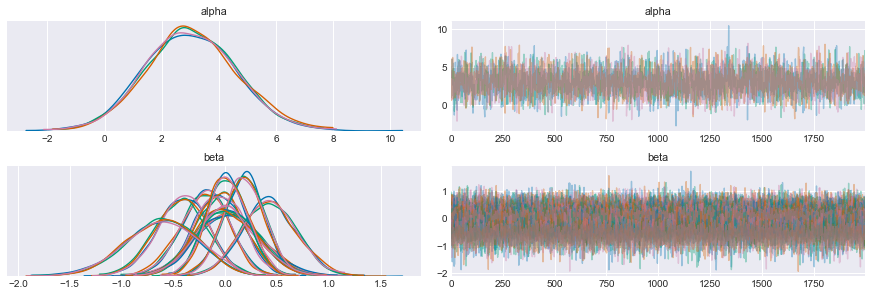

In [37]:
pm.traceplot(trace_log_mv2)
pm.summary(trace_log_mv2)

<p style='text-align:justify;'>We developed also a trace for the data of the model using an acceptance of 90% of the values. As the difference was small we decided to continue with the original trace. We present the plots for the posterior distribution of the model previously presented with an HPD of 94% for the parameters $\beta$ and $\alpha$. </p>

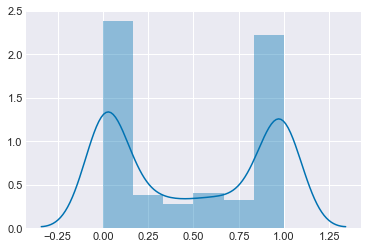

In [70]:
#help(pm.sample_prior_predictive)
ppc = pm.sample_prior_predictive( model=model_log, samples=1000,random_seed=42)
predict_y = ppc['yl']
sns.distplot(predict_y.mean(axis=1));

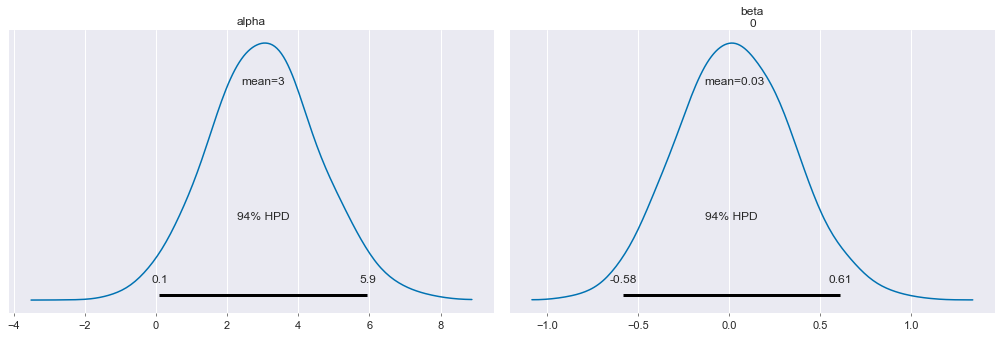

In [59]:
pm.plot_posterior(trace_log);

<p style='text-align:justify;'>With the psoterior we analyze how the range of the values for $\alpha$ is far for a 94% HPD. Furhtermore, for $\beta$ moves between a negative and a positive value. This shows the effect of the parameter in the model created.</p>

In [57]:
with pm.Model() as model_log_test:
    alpha = pm.Normal('alpha', mu=0, sd=2)
    beta = pm.Normal('beta', mu=0, sd=2, shape=(n_feat))
    mu = alpha + pm.math.dot(X_test, beta)
    theta = pm.math.sigmoid(mu)
    #theta = pm.math.exp(mu)/pm.math.sum(pm.math.exp(mu))
    #yl = pm.Categorical('yl', p=theta, observed=y_test)
    yl = pm.Bernoulli('yl', p=theta, observed=y_test)
    pred_prior_h_test = pm.sample_prior_predictive(samples = 2000,random_seed=1234)

In [42]:
ppc_log = pm.sample_posterior_predictive(trace_log, model=model_log_test, samples=1000,random_seed=42)
yhat = ppc_log['yl']
#print(yhat.shape)
y_pred = np.array([stats.mode(yhat[:,i])[0][0] for i in range(yhat.shape[1])])

100%|██████████| 1000/1000 [00:00<00:00, 1264.57it/s]


In [44]:
pm.hpd(trace_log['beta'])

array([[-0.580581  ,  0.60998035],
       [-0.62571518,  0.24135152],
       [-0.89231579,  0.03615388],
       [-0.48344485,  0.37077002],
       [-0.53687181,  0.58195597],
       [-0.10486146,  0.87932041],
       [-0.18207392,  0.55354859],
       [-0.52105341,  0.55249752],
       [-0.33618313,  0.3938041 ],
       [-1.29648518,  0.00427423]])

## Part 6: Model Validation and Data Prediction:

100%|██████████| 2000/2000 [00:01<00:00, 1212.56it/s]


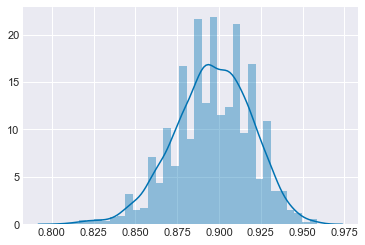

In [46]:
post_preds = pm.sample_posterior_predictive(trace_log,samples=2000,model=model_log)
#post_preds
y_pred = post_preds['yl']
#y_pred.shape
sns.distplot(y_pred.mean(axis=1));

<p style='text-align:justify;'>Based on the posterior distributions of the parameters and the posterior predictive distribution we can observe that the model is having some issues producing the prediction values as it shows that it tries to adapt with the values produced. This would mean that there are some problems with the data the model is using the data set. However, in the  prediction of data the accuracy is high.</p>

In [50]:
ppc = pm.sample_posterior_predictive(trace_log,samples = 1000, model = model_log)
y_pred = ppc['yl']
y_pred.shape

100%|██████████| 1000/1000 [00:00<00:00, 1098.15it/s]


(1000, 316)

In [43]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix for Test Data:")
print(cm)

accuracy = np.trace(cm)/np.sum(cm)
print(f'Accuracy is {np.round(accuracy,2)}')

Confusion Matrix for Test Data:
[[ 0  8]
 [ 0 71]]
Accuracy is 0.9


<p style='text-align:justify;'>Using the prediction of data and the confusion matrix we find that the model has a good accuray but it only uses true positives. This means that the sample of the model might be too short as it was not able to generate new  data that was 'T'. Furthermore, the model developed a small amount of claims that it was an 'A' when it was not. For this the idea would be to have a larger data sample than the one obtained in this model, or use one of the strategies presented in Machine Learning for the development of the algorithm. However, we can analyze with the accuracy in this model which families status do correspond to 'T' (families living together) based on the lifestyle</p>